# Milestone #1

## Prostate Cancer Signs

### Problem

The problem that I would like to address is prostate cancer. From the Center of Disease Control, about 13 men out of every 100 will develop prostate cancer in their lifetime. I personally do not have prostate cancer but my father was diasnosed some years ago with it. He has since been testing negative for prostate cancer ever since. Nonetheless, With age being the most common risk factor and having a family member be diagnosed with it oes give an increase it being diagnosed with it yourself in the future.

I would like to do some simple correlation graphs to see if there are any factors that correlate together that might be worth putting more research into. With any correlating features, I would like to make a prediction model, train it with some of the data, and then test it with a larger portion of the data. 

The data set contains 100 observations and 10 features. Features range from "radius", "texture", "perimeter" and other size measures to one feature that is categorical for a diagnosis result whether a patient result was "B" for Begnin or "M" for Malignant that I plan on using to test the models accuracy. I know i will have to change this catigorical data set to binary so that I can do a logistic regression model.

In conclusion, I hope that by exploring this data set along with creating a prediction model can shead some light on possible prediction indicators whether or not a man has prostate cancer. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [3]:
prostate_data = pd.read_csv("/Users/theranmeadows/Desktop/dsc550datamining/FinalProject/Prostate_Cancer.csv")
prostate_data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
# Changing diagnosis_result value to 1 for positive for Malignant cancer and 0 for Bengnin cancer

prostate_data.loc[prostate_data['diagnosis_result'] == 'M', 'diagnosis_result'] = 1
prostate_data.loc[prostate_data['diagnosis_result'] == 'B', 'diagnosis_result'] = 0

In [5]:
prostate_data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
# Correlation coefficient Matrix of the data

prostate_df = pd.DataFrame(prostate_data)
prostate_df.corr()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,-0.316889,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946
diagnosis_result,-0.316889,1.000000,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180
radius,0.047276,-0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.052263,0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.215953,0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.174354,0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.258328,0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.277554,0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.222334,0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.164946,0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


What strikes me here is that diagnosis result and perimeter have the strongest correlation of all the features that a positive diagnosis was given to a patient with prostate cancer. 

Text(0, 0.5, 'Count')

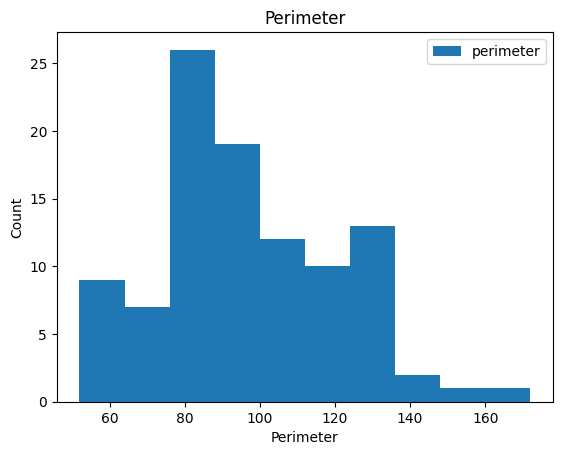

In [25]:
perm_hist = prostate_df.plot(x = 'diagnosis_result', y = 'perimeter', kind = 'hist')
plt.title('Perimeter')
plt.xlabel('Perimeter')
plt.ylabel("Count")

I chose to make a histogram of 'Permiter' becasue this was the strongest positive correlation with being diagnosed positivly. I know now that a perimeter of 90 is the most common size among patients in this set.

Text(0, 0.5, 'Count')

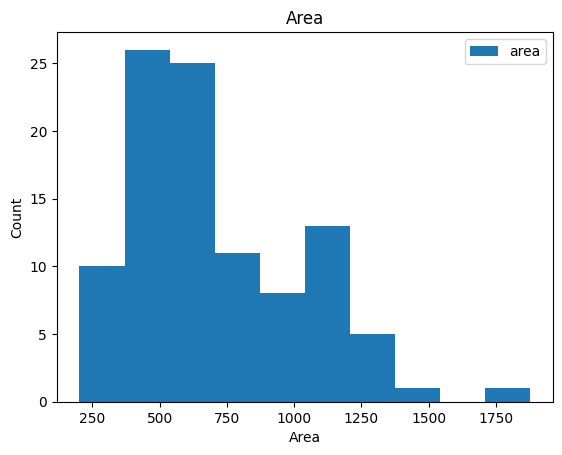

In [26]:
area_hist = prostate_df.plot(x = 'diagnosis_result', y = 'area', kind = 'hist')
plt.title('Area')
plt.xlabel('Area')
plt.ylabel("Count")

Text(0.5, 1.0, 'Perimeter vs Area')

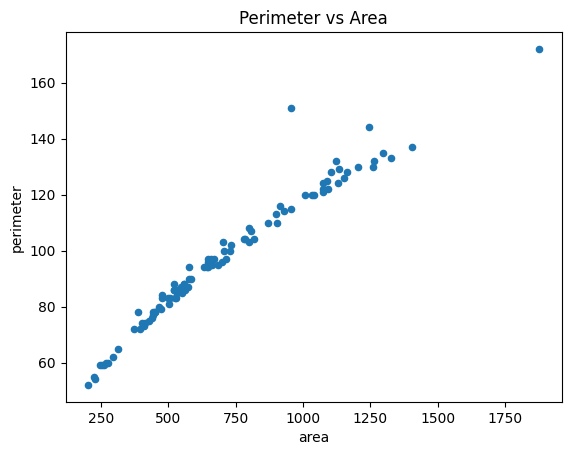

In [66]:
perm_area = prostate_df.plot(x = 'area', y = 'perimeter', kind = 'scatter')
plt.title('Perimeter vs Area')


There is  strong relationship between 'area' and 'perimeter'. As area increases, permiter is more likely to increase ans so does the chance of an enlarged prostate.

Text(0.5, 1.0, 'Area vs Compactness')

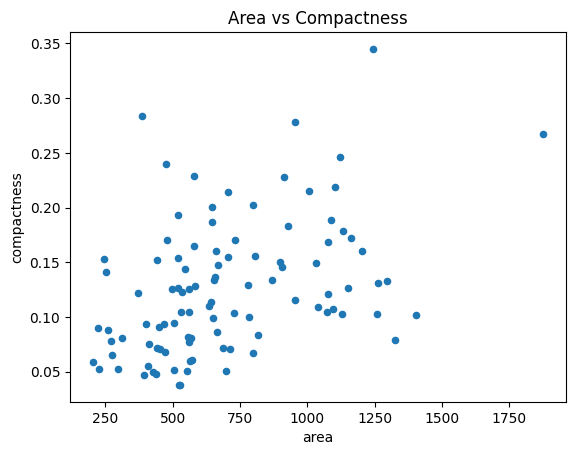

In [67]:
area_comp = prostate_df.plot(x = 'area', y = 'compactness', kind = 'scatter')
plt.title('Area vs Compactness')

Compactness seemed to be the strongest variable that correlated with Area. By the looks of the graph though, there is a very weka correlation but it appears to be positive.

Text(0.5, 1.0, 'Compactness vs Symmetry')

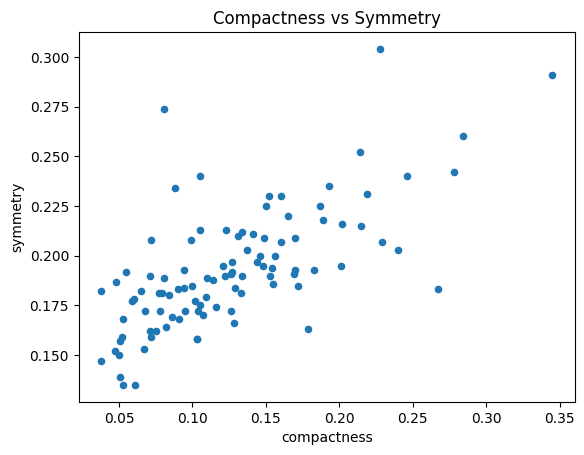

In [69]:
comp_sym = prostate_df.plot(x = 'compactness', y = 'symmetry', kind = 'scatter')
plt.title('Compactness vs Symmetry')

Measuring 'symmetry' and 'compactness', there seems to be a stronger relationship than 'compactness' and 'area'. 
But looking at the CC matrix again, we see that both 'compactness' and 'area' area stronger indicater of a positive diagnosis.